In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import data
ds_sal = pd.read_csv('/Users/bowieliu/Downloads/ds_salaries.csv')
ds_sal.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
#only intrested in full-time workers in US
df = ds_sal.loc[(ds_sal['employment_type']=='FT') & (ds_sal['employee_residence']=='US')]
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
13,13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L


In [27]:
#average salary for data analyst in general
df_analyst_mean = df.loc[df['job_title'].str.contains('Data Analyst')].salary_in_usd.mean()
df_analyst_mean
#Average salary for data analyst is $113,036

113036.26582278482

In [26]:
#in my case, I am interested in entry level data analyst salary only
df_en_analyst_mean = df.loc[(df['job_title'].str.contains('Data Analyst')) & (df['experience_level']=='EN')].salary_in_usd.mean()
df_en_analyst_mean
#Average salary for entry level data analyst is $74,750

74750.0

In [28]:
#also intested in machine learning engineer average salary
df_ml_mean = df.loc[df['job_title'].str.contains('Machine Learning')].salary_in_usd.mean()
df_ml_mean
#Average salary of ML engineer is $179,924

179924.66666666666

In [29]:
#last, I want to find the average salary for data scientist as well
df_ds_mean = df.loc[df['job_title'].str.contains('Data Scientist')].salary_in_usd.mean()
df_ds_mean
#Average salary for data scientist is $154,868

154868.82352941178

In [31]:
#Comparng salaries between remote and on-site
#<20% remote ratio = on-site
#>80% remote ratio = fully remote
df_remote = df.loc[(df['remote_ratio'] <= 20) | (df['remote_ratio'] >= 80)]
df_remote.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
13,13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
14,14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L


In [34]:
#average salary for on-site
df_site_mean = df_remote[df_remote['remote_ratio'] <= 20].salary_in_usd.mean()
df_site_mean
#Average salary for on-site data analyst, data scientist, and ML engineer is $141,253

141253.37313432837

In [35]:
#average salary for remote
df_remote_mean = df_remote[df_remote['remote_ratio'] >= 80].salary_in_usd.mean()
df_remote_mean
#Average salary for remote data analyst, data scientist, and ML engineer is $150,820

150820.63524590165

In [36]:
#On average, remote jobs pay more 

In [40]:
#Last, I'm interested in salary comparison between large and small sized companies
#average salary for large size company
df_large_mean = df[df['company_size']=='L'].salary_in_usd.mean()
df_large_mean
#Average salary for large sized company is $167,752

167752.4081632653

In [41]:
#average salary for small sized company
df_small_mean = df[df['company_size']=='S'].salary_in_usd.mean()
df_small_mean
#Average salary for small sized company is $105,425

105425.0

In [42]:
#Large sized company pays more than small sized companies

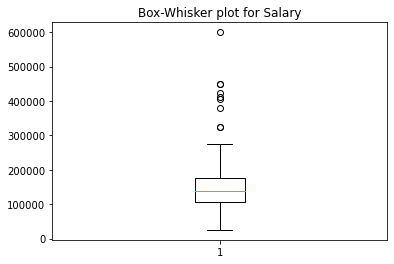

In [45]:
#Box-whisker plot for salary
plt.boxplot(df['salary'])
plt.title('Box-Whisker plot for Salary')
plt.show()

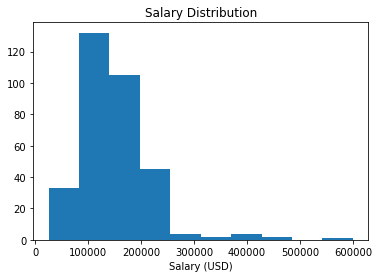

In [53]:
#Salary distributon
plt.hist(df['salary_in_usd'])
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.show()